# Correlation between Executable-metrics Vs Diamond-metrics

*We study the correlation between two data sets in this study. Liebherr collects a vast amount of data about the operation of their cranes from a variety of sources. To properly store and access these data for subsequent analysis, only necessary data must be retained, and any redundant data sets must be recognized and eliminated to avoid duplication. We analyze and correlate metrics from an executable program running on crane CMS with metrics output by the Diamond application for this project. The data for this investigation came from the CC2142 Liverpool crane operation, logged from January 21 to February 16, 2022. Complete codes for this project can be accessed at <https://github.com/sharsadkk/Data-Projects>.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

## Reading python-exe metrics
- First column from the excel file is read as index of the df.
- Data/Time metrics are parsed as date time object from string datatype. 
- After reading the data, reindexed the df to range index and included the original index as one of the columns.

In [2]:
df_combined = pd.read_excel('combined_report.xlsx', index_col=[0], parse_dates=[5,6]).rename_axis('File_id')
df_combined.reset_index(inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   File_id                           857 non-null    object        
 1   Cycle Number (Int)                857 non-null    int64         
 2   Cyc_type (Int)                    857 non-null    object        
 3   dual_cyc (Int)                    857 non-null    int64         
 4   Op_type (Int)                     857 non-null    int64         
 5   Cycle_start_t_str (string)        857 non-null    datetime64[ns]
 6   Cycle_end_t_str (string)          857 non-null    datetime64[ns]
 7   cyc_t_with_wait (s)               857 non-null    float64       
 8   wait_within_cyc (s)               857 non-null    int64         
 9   cyc_t_no_wait (s)                 857 non-null    float64       
 10  Brake_closed_within_cyc (s)       857 non-null    

## Reading Loadstatistics
Load-Statistics data set from Diamond metrics contain numerous invalid data in the form of 0 and missing values. Columns containing too many missing values are deleted as they cannot be used for finding correlation.
- Load-Statistics report values for end of the lifting cycle and end of the complete cycle (including Travelling half-cycle). For instance metrics `TrolleyEndPosition` and `TrolleyPOsitionFinal` reports the Trolley position at the end of the lifting cycle and at the end of the Travelling half-cycle respectively. Metrics that report values for the end of the complete cycle including the Travelling half-cycle usually contains the term `Final`. 
- Missing values are read as 0.
- Replaced 0 with NaN so that now all invalid values are converted to NaN.
- Total of 980 entries in the data-set. Any columns with less than 500 valid entries are dropped. 

In [3]:
df_load = pd.read_excel('Load_statistics.xlsx', na_values=0)
df_load.replace(0, np.nan, inplace=True)
df_load.dropna(axis=1, thresh=500, inplace=True)
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           980 non-null    int64         
 1   ContainerType                980 non-null    int64         
 2   StartTime                    980 non-null    datetime64[ns]
 3   EndTime                      980 non-null    datetime64[ns]
 4   HoistStartPosition           980 non-null    float64       
 5   HoistEndPosition             980 non-null    float64       
 6   TravelStartPosition          980 non-null    float64       
 7   TravelEndPosition            980 non-null    float64       
 8   TrolleyStartPosition         980 non-null    float64       
 9   TrolleyEndPosition           980 non-null    float64       
 10  Load                         971 non-null    float64       
 11  ExcentricLoad                971 non-null    

## Inspect the first few rows of Exe-metrics and suffix column headers X
Inspecting the column headers of Metrics from CMS executable shows many inconsistencies. For ease of analysis, column names are changed to lower case letters and characters like whitespaces and paranthesis are replaced by underscore.
- columns containing cycle start and end time are renamed to `cycle_start` and `cycle_end` respectively.
- To distinguish between Executable metrics and Diamond Metrics, Exe-metrics are suffixed with **_X**.

In [4]:
pd.options.display.max_columns = df_combined.shape[1]
df_combined.columns = (
                      df_combined.columns.str.replace(' ','_').
                      str.replace('(','').str.replace(')','').
                      str.replace('/','per').
                      str.lower()
)
df_combined.rename(columns={'cycle_start_t_str_string':'cycle_start',
                           'cycle_end_t_str_string':'cycle_end'}, inplace=True)
df_combined.columns+='_X'
df_combined.head()

c:\users\sharsad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,file_id_X,cycle_number_int_X,cyc_type_int_X,dual_cyc_int_X,op_type_int_X,cycle_start_X,cycle_end_X,cyc_t_with_wait_s_X,wait_within_cyc_s_X,cyc_t_no_wait_s_X,brake_closed_within_cyc_s_X,pick_wait_s_X,drop_wait_s_X,idle_within_cyc_min_X,max_per_cyc_hoist_speed_mpermin_X,ave_per_cyc_hoist_speed_mpermin_X,hoist_up_m_X,hoist_down_m_X,energy_per_cyc_kwh_X,regen_energy_per_cyc_kwh_X,net_energy_per_cyc_kwh_X,energy_per_cyc_meter_kwh_X,regen_energy_per_cyc_meter_kwh_X,net_energy_per_cyc_meter_kwh_X,max_power_per_cyc_kw_X,in_cyc_wind_speed_mpermin_X,lifted_load_per_cyc_t_X,lifted_load_per_cyc_2_t_X,outreach_max_pos_m_X,pick_pos_time__s_X,drop_pos_time__s_X,trolley_distance_p_m_X,trolley_distance_n_m_X,trolley_distance_r_int_X,hoist_distance_p_m_X,hoist_distance_n_m_X,hoist_distance_r_int_X,gantry_distance_p_m_X,gantry_distance_n_m_X,gantry_distance_r_int_X,gantry_distance_t_m_X,full_speed_trolley_pct_percent_X,full_speed_hoist_pct_percent_X,start_travel_m_X,start_trolley_m_X,start_hoist_m_X,end_travel_m_X,end_trolley_m_X,end_hoist_m_X
0,20220204_09,1,"[1, 4]",0,40,2022-02-04 09:21:34.221,2022-02-04 09:23:57.540,144.12,0,144.12,0,1.041,2.38,0,70.937856,-11.477241,28.107001,26.575001,6.509273,2.987197,3.522076,6.328742,-3.078731,3.250011,862.599768,14.523001,26.415500,10.301900,41.373660,1.06,5.94,28.804666,-33.608698,2,47.466551,-55.555401,6,0.0000,0.000000,0,0.0000,0.000000,0,-22.896999,11.144580,5.940,-22.896999,41.304646,7.472
1,20220204_09,2,"[1, 4]",0,40,2022-02-04 09:23:57.880,2022-02-04 09:26:08.980,131.20,0,131.20,0,0.680,1.26,0,69.788400,4.609638,30.955000,23.654000,6.513641,2.066131,4.447510,6.539979,-1.906911,4.633068,798.519406,15.043001,28.729889,24.137414,41.331230,4.84,3.64,41.438403,-0.064435,3,48.461250,-28.773300,7,0.0000,0.000000,0,0.0000,0.000000,0,-22.896999,10.079680,3.087,-22.896999,41.307470,10.388
2,20220204_09,3,"[1, 4]",0,40,2022-02-04 09:26:09.220,2022-02-04 09:28:13.460,124.12,0,124.12,0,1.440,2.04,0,123.484416,-7.552982,8.275000,20.143999,3.262392,1.805944,1.456448,2.858056,-1.089468,1.768588,860.560556,15.035001,3.972625,15.849820,51.454573,3.88,2.40,0.039266,-42.040781,2,27.634150,-47.270399,5,0.0000,-0.942151,0,0.0000,0.000000,0,-22.896999,51.454550,22.879,-22.896999,41.332021,11.010
3,20220204_09,4,"[1, 4]",0,40,2022-02-04 09:28:13.800,2022-02-04 09:32:04.060,230.26,0,230.26,0,2.400,2.38,0,127.014888,0.434759,35.004999,35.000000,6.915990,2.750090,4.165900,6.985172,-1.656347,5.328825,817.476436,14.497001,6.578818,24.138667,48.943843,2.76,5.00,52.074475,-51.308488,9,63.807999,-61.035550,10,0.9192,0.000000,0,0.9192,0.000000,0,-23.844999,9.429208,3.107,-22.917999,10.210053,3.112
4,20220204_09,5,"[1, 1]",0,40,2022-02-04 09:32:04.400,2022-02-04 09:35:45.960,221.56,0,221.56,0,2.720,2.16,0,80.544024,5.603841,29.427000,21.657000,6.882930,2.594911,4.288018,7.260608,-2.265449,4.995159,796.806621,13.863001,23.339628,24.776731,72.159927,7.32,6.94,62.883723,-63.130857,4,47.143048,-47.117798,5,0.0000,0.000000,0,0.0000,9.436627,0,-22.917999,10.192138,5.990,-22.917999,72.159308,13.760


## Inspect the first few rows of Load-Statistics and suffix column headers Y
Column headers of Diamond data are all in `CamelCase`. For consistency, column names are changed to `snake_case`.
- To distinguish between Executable metrics and Diamond Metrics, Diamond-metrics are suffixed with **_Y**.

In [5]:
import re
df_load.columns = [re.sub('(?!^)([A-Z]+)', r'_\1', col).lower() for col in df_load.columns]
df_load.columns+='_Y'
df_load.iloc[10:15]

,i_d_Y,container_type_Y,start_time_Y,end_time_Y,hoist_start_position_Y,hoist_end_position_Y,travel_start_position_Y,travel_end_position_Y,trolley_start_position_Y,trolley_end_position_Y,load_Y,excentric_load_Y,spreader_type_Y,max_hoist_height_not_empty_Y,max_hoist_speed_not_empty_up_Y,max_hoist_speed_not_empty_down_Y,max_travel_speed_not_empty_Y,max_trolley_speed_not_empty_Y,duration_manual_not_empty_Y,is_electric_move_not_empty_Y,electric_consumption_not_empty_Y,electric_feedback_not_empty_Y,max_hoist_height_empty_Y,max_hoist_speed_empty_up_Y,max_hoist_speed_empty_down_Y,max_travel_speed_empty_Y,max_trolley_speed_empty_Y,duration_manual_empty_Y,is_electric_move_empty_Y,electric_consumption_empty_Y,electric_feedback_empty_Y,cycle_final_time_Y,hoist_position_final_Y,travel_position_final_Y,trolley_position_final_Y,spreader_idfront_Y,spreader_idback_Y
10,4734,40,2022-02-04 09:21:35,2022-02-04 09:23:03,6.028000,7.471,-22.896999,-22.896999,10.323000,41.117001,25.536736,-3.804,1,34.043999,82.057999,-84.387001,0.025,114.805000,88,True,16675200,-8064000.0,31.320999,176.216003,-103.268997,0.025,182.498993,55,True,6451200,-2750400.0,2022-02-04 09:23:58,3.135000,-22.896999,10.303000,-1,-1
11,4735,40,2022-02-04 09:23:58,2022-02-04 09:25:15,3.135000,10.387,-22.896999,-22.896999,10.303000,41.111000,23.415638,-3.045,1,34.040001,81.197998,-81.299004,0.025,113.628998,77,True,18288000,-7549200.0,28.302000,174.949997,-53.507000,0.025,89.583000,56,True,5889600,-478800.0,2022-02-04 09:26:11,23.030001,-22.896999,51.169998,-1,-1
12,4736,40,2022-02-04 09:26:11,2022-02-04 09:26:58,23.030001,11.009,-22.896999,-22.896999,51.169998,41.133999,4.921546,2.859,1,31.153999,139.970001,-88.842003,0.025,108.335999,48,True,2923200,-2041200.0,30.582001,175.557007,-126.403000,11.653,172.175003,77,True,7977600,-2660400.0,2022-02-04 09:28:16,3.147000,-23.844999,9.704000,-1,-1
13,4737,40,2022-02-04 09:28:16,2022-02-04 09:30:27,3.147000,3.111,-23.844999,-22.917999,9.704000,10.454000,7.380708,1.591,1,38.110001,146.602005,-93.803001,7.462,157.276993,131,True,15969600,-4626000.0,29.612000,175.709000,-136.830994,NaN,88.995003,100,True,9331200,-2595600.0,2022-02-04 09:32:07,6.048000,-22.917999,10.403000,-1,-1
14,4738,40,2022-02-04 09:32:07,2022-02-04 09:33:16,6.048000,13.759,-22.917999,-22.917999,10.403000,71.637001,22.582256,-2.071,1,35.424000,92.638000,-95.220001,0.025,235.556000,69,True,15969600,-6163200.0,31.525999,175.557007,-110.254997,0.025,216.998993,152,True,10180800,-2800800.0,2022-02-04 09:35:47,6.047000,-22.917999,10.166000,-1,-1


## Create key column by extracting upto minutes from cycle start-time
In order to find the correlation between two data-sets, it's important to establish a key column which is common to both data-sets. From inspection, start time of each operation cycle from each data are in agreement upto **Minutes**. `cycle_start` time from both data sets are rounded upto minutes to create a new key column.
- `cycle_id` key-column is created for both data-sets from `cycle_start` time column.
- Duplicate entries resulting from rounding up are removed so that the values are unique.

In [6]:
df_combined['cycle_id'] = df_combined['cycle_start_X'].dt.floor("min")
df_combined.drop_duplicates('cycle_id', keep='first', inplace=True)
df_load['cycle_id'] = df_load['start_time_Y'].dt.floor("min")
df_load.drop_duplicates('cycle_id', keep='first', inplace=True)

display(df_combined['cycle_id'].head(), df_load['cycle_id'][10:15])
# print()
# print(len(df_combined['cycle_id'].value_counts()), len(df_combined['cycle_id']))
# print()
# print(len(df_load['cycle_id'].value_counts()), len(df_load['cycle_id']))

0   2022-02-04 09:21:00
1   2022-02-04 09:23:00
2   2022-02-04 09:26:00
3   2022-02-04 09:28:00
4   2022-02-04 09:32:00
Name: cycle_id, dtype: datetime64[ns]

10   2022-02-04 09:21:00
11   2022-02-04 09:23:00
12   2022-02-04 09:26:00
13   2022-02-04 09:28:00
14   2022-02-04 09:32:00
Name: cycle_id, dtype: datetime64[ns]

## Removing unwanted columns from Loadstatistics
By inspecting the values and from column headers, it's obvious that there are many columns in both data-set that are different. In such cases, excluding those column from correlation analysis only seem to be logic. Removing those columns will ensure a better analysis in determining relationship among columns that are likely to contain same data. 

In [7]:
cols_reqd = ['cycle_id', 'container_type', 'start_time', 'end_time',
       'hoist_start_position', 'hoist_end_position', 'travel_start_position',
       'travel_end_position', 'trolley_start_position', 'trolley_end_position',
       'load', 'excentric_load', 'max_hoist_height_not_empty',
       'max_hoist_speed_not_empty_up', 'max_hoist_speed_not_empty_down',
       'max_travel_speed_not_empty', 'max_trolley_speed_not_empty',
       'max_hoist_height_empty', 'max_hoist_speed_empty_up',
       'max_hoist_speed_empty_down', 'max_travel_speed_empty', 'max_trolley_speed_empty',
       'cycle_final_time', 'hoist_position_final',
       'travel_position_final', 'trolley_position_final',]
cols_reqd = [col+'_Y' if col!='cycle_id' else col for col in cols_reqd]
df_load = df_load.loc[:, cols_reqd]
df_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   cycle_id                          979 non-null    datetime64[ns]
 1   container_type_Y                  979 non-null    int64         
 2   start_time_Y                      979 non-null    datetime64[ns]
 3   end_time_Y                        979 non-null    datetime64[ns]
 4   hoist_start_position_Y            979 non-null    float64       
 5   hoist_end_position_Y              979 non-null    float64       
 6   travel_start_position_Y           979 non-null    float64       
 7   travel_end_position_Y             979 non-null    float64       
 8   trolley_start_position_Y          979 non-null    float64       
 9   trolley_end_position_Y            979 non-null    float64       
 10  load_Y                            970 non-null    

## Removing unwanted columns from Exe-metrics
Similar to Diamond data-set, there are many columns in Executable data-set that are pointing to entirely different metrics. We can remove those columns and condense the dataset to contain only required columns.

In [8]:
cols_reqd = ['cycle_id',
       'op_type_int', 'cycle_start', 'cycle_end', 
       'max_per_cyc_hoist_speed_mpermin', 'ave_per_cyc_hoist_speed_mpermin',
       'hoist_up_m', 'hoist_down_m',
        'lifted_load_per_cyc_t',
       'lifted_load_per_cyc_2_t', 'outreach_max_pos_m', 
       'trolley_distance_p_m', 'trolley_distance_n_m',
       'hoist_distance_p_m', 'hoist_distance_n_m',
       'gantry_distance_p_m', 'gantry_distance_n_m','gantry_distance_t_m',
       'full_speed_trolley_pct_percent', 'full_speed_hoist_pct_percent',
       'start_travel_m', 'start_trolley_m', 'start_hoist_m', 'end_travel_m',
       'end_trolley_m', 'end_hoist_m', ]
cols_reqd = [col+'_X' if col!='cycle_id' else col for col in cols_reqd]
df_combined = df_combined.loc[:, cols_reqd]
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 856
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   cycle_id                           856 non-null    datetime64[ns]
 1   op_type_int_X                      856 non-null    int64         
 2   cycle_start_X                      856 non-null    datetime64[ns]
 3   cycle_end_X                        856 non-null    datetime64[ns]
 4   max_per_cyc_hoist_speed_mpermin_X  856 non-null    float64       
 5   ave_per_cyc_hoist_speed_mpermin_X  856 non-null    float64       
 6   hoist_up_m_X                       856 non-null    float64       
 7   hoist_down_m_X                     856 non-null    float64       
 8   lifted_load_per_cyc_t_X            856 non-null    float64       
 9   lifted_load_per_cyc_2_t_X          855 non-null    float64       
 10  outreach_max_pos_m_X               856

## Merge data by performing an inner join on exe-metric table using 'cycle_id' key column
To find the correlation, we need to combine both data-sets and treat them as a single data based on the key-column we created earlier. In our case, there is no point searching for correlation among values in data-sets which does not share common cycle start time.
- `Inner` join is performed on both data-sets based on key column `cycle_id` to combine them to a single data-set.

In [9]:
df_merge = df_combined.merge(df_load, on='cycle_id', how='inner')
pd.options.display.max_columns = df_merge.shape[1]
display(df_merge.head())
df_merge.info()

,cycle_id,op_type_int_X,cycle_start_X,cycle_end_X,max_per_cyc_hoist_speed_mpermin_X,ave_per_cyc_hoist_speed_mpermin_X,hoist_up_m_X,hoist_down_m_X,lifted_load_per_cyc_t_X,lifted_load_per_cyc_2_t_X,outreach_max_pos_m_X,trolley_distance_p_m_X,trolley_distance_n_m_X,hoist_distance_p_m_X,hoist_distance_n_m_X,gantry_distance_p_m_X,gantry_distance_n_m_X,gantry_distance_t_m_X,full_speed_trolley_pct_percent_X,full_speed_hoist_pct_percent_X,start_travel_m_X,start_trolley_m_X,start_hoist_m_X,end_travel_m_X,end_trolley_m_X,end_hoist_m_X,container_type_Y,start_time_Y,end_time_Y,hoist_start_position_Y,hoist_end_position_Y,travel_start_position_Y,travel_end_position_Y,trolley_start_position_Y,trolley_end_position_Y,load_Y,excentric_load_Y,max_hoist_height_not_empty_Y,max_hoist_speed_not_empty_up_Y,max_hoist_speed_not_empty_down_Y,max_travel_speed_not_empty_Y,max_trolley_speed_not_empty_Y,max_hoist_height_empty_Y,max_hoist_speed_empty_up_Y,max_hoist_speed_empty_down_Y,max_travel_speed_empty_Y,max_trolley_speed_empty_Y,cycle_final_time_Y,hoist_position_final_Y,travel_position_final_Y,trolley_position_final_Y
0,2022-02-04 09:21:00,40,2022-02-04 09:21:34.221,2022-02-04 09:23:57.540,70.937856,-11.477241,28.107001,26.575001,26.415500,10.301900,41.373660,28.804666,-33.608698,47.466551,-55.555401,0.0000,0.000000,0.0000,0.000000,0,-22.896999,11.144580,5.940,-22.896999,41.304646,7.472,40,2022-02-04 09:21:35,2022-02-04 09:23:03,6.028000,7.471,-22.896999,-22.896999,10.323000,41.117001,25.536736,-3.804,34.043999,82.057999,-84.387001,0.025,114.805000,31.320999,176.216003,-103.268997,0.025,182.498993,2022-02-04 09:23:58,3.135000,-22.896999,10.303000
1,2022-02-04 09:23:00,40,2022-02-04 09:23:57.880,2022-02-04 09:26:08.980,69.788400,4.609638,30.955000,23.654000,28.729889,24.137414,41.331230,41.438403,-0.064435,48.461250,-28.773300,0.0000,0.000000,0.0000,0.000000,0,-22.896999,10.079680,3.087,-22.896999,41.307470,10.388,40,2022-02-04 09:23:58,2022-02-04 09:25:15,3.135000,10.387,-22.896999,-22.896999,10.303000,41.111000,23.415638,-3.045,34.040001,81.197998,-81.299004,0.025,113.628998,28.302000,174.949997,-53.507000,0.025,89.583000,2022-02-04 09:26:11,23.030001,-22.896999,51.169998
2,2022-02-04 09:26:00,40,2022-02-04 09:26:09.220,2022-02-04 09:28:13.460,123.484416,-7.552982,8.275000,20.143999,3.972625,15.849820,51.454573,0.039266,-42.040781,27.634150,-47.270399,0.0000,-0.942151,0.0000,0.000000,0,-22.896999,51.454550,22.879,-22.896999,41.332021,11.010,40,2022-02-04 09:26:11,2022-02-04 09:26:58,23.030001,11.009,-22.896999,-22.896999,51.169998,41.133999,4.921546,2.859,31.153999,139.970001,-88.842003,0.025,108.335999,30.582001,175.557007,-126.403000,11.653,172.175003,2022-02-04 09:28:16,3.147000,-23.844999,9.704000
3,2022-02-04 09:28:00,40,2022-02-04 09:28:13.800,2022-02-04 09:32:04.060,127.014888,0.434759,35.004999,35.000000,6.578818,24.138667,48.943843,52.074475,-51.308488,63.807999,-61.035550,0.9192,0.000000,0.9192,0.000000,0,-23.844999,9.429208,3.107,-22.917999,10.210053,3.112,40,2022-02-04 09:28:16,2022-02-04 09:30:27,3.147000,3.111,-23.844999,-22.917999,9.704000,10.454000,7.380708,1.591,38.110001,146.602005,-93.803001,7.462,157.276993,29.612000,175.709000,-136.830994,NaN,88.995003,2022-02-04 09:32:07,6.048000,-22.917999,10.403000
4,2022-02-04 09:32:00,40,2022-02-04 09:32:04.400,2022-02-04 09:35:45.960,80.544024,5.603841,29.427000,21.657000,23.339628,24.776731,72.159927,62.883723,-63.130857,47.143048,-47.117798,0.0000,0.000000,0.0000,9.436627,0,-22.917999,10.192138,5.990,-22.917999,72.159308,13.760,40,2022-02-04 09:32:07,2022-02-04 09:33:16,6.048000,13.759,-22.917999,-22.917999,10.403000,71.637001,22.582256,-2.071,35.424000,92.638000,-95.220001,0.025,235.556000,31.525999,175.557007,-110.254997,0.025,216.998993,2022-02-04 09:35:47,6.047000,-22.917999,10.166000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 811
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   cycle_id                           812 non-null    datetime64[ns]
 1   op_type_int_X                      812 non-null    int64         
 2   cycle_start_X                      812 non-null    datetime64[ns]
 3   cycle_end_X                        812 non-null    datetime64[ns]
 4   max_per_cyc_hoist_speed_mpermin_X  812 non-null    float64       
 5   ave_per_cyc_hoist_speed_mpermin_X  812 non-null    float64       
 6   hoist_up_m_X                       812 non-null    float64       
 7   hoist_down_m_X                     812 non-null    float64       
 8   lifted_load_per_cyc_t_X            812 non-null    float64       
 9   lifted_load_per_cyc_2_t_X          811 non-null    float64       
 10  outreach_max_pos_m_X               812

Resulting data-set after combining is likely to have fewer entries than either of the data-set since we performed an `Inner` join. This is due to :
- `Inner` join combines only rows that have same key-column value in both data-set.
- Among the data-set, Diamond metrics seem to register more cycles(entries) than Executable application. Usually, when signals are corrupted or missing, no cycles can be registered by Executable application, but for those timeline, cycles are found to be registered in Diamond data. This has been verified using Tracescope tool.
- There are a few entries in Executable data that are not in Diamond data, which need to be investigated. 

In [10]:
print('Size of Exe-metrics data:', df_combined.shape[0], 'rows', df_combined.shape[1], 'columns')
print('Size of Load-Stat data:', df_load.shape[0], 'rows', df_load.shape[1], 'columns')
print('Size of Merged data:', df_merge.shape[0], 'rows', df_merge.shape[1], 'columns')

Size of Exe-metrics data: 856 rows 26 columns
Size of Load-Stat data: 979 rows 26 columns
Size of Merged data: 812 rows 51 columns


## Replacing missing values with mean values of columns in the merged data
To perform correlation, it's important to replace missing values. One of the ways  is to replace missing values by the mean of the corresponding column. Replacing missing values with 0 might result in incorrect correlation values. In cases for the entire column is NaN, the mean will also be NaN. So to ensure there are no missing values in the data-set, we will replace any remaining NaN values by 0.  

In [11]:
df_merge.fillna(df_merge.mean(), inplace=True)
df_merge.fillna(0, inplace=True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 811
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   cycle_id                           812 non-null    datetime64[ns]
 1   op_type_int_X                      812 non-null    int64         
 2   cycle_start_X                      812 non-null    datetime64[ns]
 3   cycle_end_X                        812 non-null    datetime64[ns]
 4   max_per_cyc_hoist_speed_mpermin_X  812 non-null    float64       
 5   ave_per_cyc_hoist_speed_mpermin_X  812 non-null    float64       
 6   hoist_up_m_X                       812 non-null    float64       
 7   hoist_down_m_X                     812 non-null    float64       
 8   lifted_load_per_cyc_t_X            812 non-null    float64       
 9   lifted_load_per_cyc_2_t_X          812 non-null    float64       
 10  outreach_max_pos_m_X               812

c:\users\sharsad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


## Create correlation matrix
Correlation matrix of a dataset shows correlation values of each columns with every other columns including that column itself. Since we are only interested in correlation between columns from Executable dataset against columns from Diamond dataset, we must extract the required data from the resulting correlation matrix to refelct that.
- Create correlation matrix of entire data-set.
- Extract correlation matrix of only Executable metrics against Diamond metrics.
- Resulting matrix will have Executable metrics along horizontal axis and Diamond metrics along vertical axis. Diamond metrics and Execuatable metrics can be identified by _Y and _X suffixes respectively.

In [12]:
corr_df = df_merge.corr()
corr_df.fillna(0, inplace=True)
# display(corr_df.shape)
corr_matrix = corr_df.loc['container_type_Y':'trolley_position_final_Y', 'op_type_int_X':'end_hoist_m_X']
# display(corr_matrix.shape)
display(corr_matrix)
mask = ((corr_matrix>-0.9) & (corr_matrix<=0)) | ((corr_matrix<0.89) & (corr_matrix>=0))

,op_type_int_X,max_per_cyc_hoist_speed_mpermin_X,ave_per_cyc_hoist_speed_mpermin_X,hoist_up_m_X,hoist_down_m_X,lifted_load_per_cyc_t_X,lifted_load_per_cyc_2_t_X,outreach_max_pos_m_X,trolley_distance_p_m_X,trolley_distance_n_m_X,hoist_distance_p_m_X,hoist_distance_n_m_X,gantry_distance_p_m_X,gantry_distance_n_m_X,gantry_distance_t_m_X,full_speed_trolley_pct_percent_X,full_speed_hoist_pct_percent_X,start_travel_m_X,start_trolley_m_X,start_hoist_m_X,end_travel_m_X,end_trolley_m_X,end_hoist_m_X
container_type_Y,1.000000,-0.272714,0.078370,0.025871,-0.101054,0.259090,0.065369,0.069497,0.123930,-0.140193,-0.152616,0.149497,-0.082815,0.092333,-0.044230,0.054266,0.0,-0.296768,0.051545,0.266217,-0.297146,-0.070130,0.416784
hoist_start_position_Y,0.266799,0.149726,-0.581361,-0.731553,-0.035752,-0.276071,0.305212,0.052774,-0.090397,0.053453,-0.444657,0.391483,-0.016700,-0.009339,-0.034617,-0.030255,0.0,-0.113410,0.150955,0.999944,-0.113701,-0.050971,0.093861
hoist_end_position_Y,0.418820,0.195620,0.605677,0.000141,-0.719588,-0.244102,0.070537,0.057674,-0.028832,0.039330,-0.398913,0.423967,0.039014,0.002103,0.004908,0.047514,0.0,-0.083086,0.007840,0.094915,-0.083043,0.092829,0.988219
travel_start_position_Y,-0.296768,0.154580,0.007124,-0.383553,-0.404194,-0.136352,0.057837,-0.223816,-0.222356,0.189887,-0.361587,0.357837,-0.008676,-0.068737,-0.006383,0.007801,0.0,1.000000,-0.086057,-0.112494,0.999964,0.047301,-0.088855
travel_end_position_Y,-0.297146,0.154478,0.007200,-0.383262,-0.404157,-0.136244,0.058905,-0.223686,-0.222575,0.189834,-0.360854,0.357133,-0.008184,-0.068608,0.002111,0.007808,0.0,0.999964,-0.085624,-0.112783,1.000000,0.047287,-0.088814
trolley_start_position_Y,0.055404,0.034482,-0.206774,-0.178537,-0.059797,-0.041040,0.102253,0.172312,-0.210016,-0.004554,-0.083066,0.061125,0.017987,-0.025250,0.050237,-0.226194,0.0,-0.092535,0.999669,0.159232,-0.092105,-0.745067,0.004325
trolley_end_position_Y,-0.065874,0.053269,0.183682,0.049816,-0.059447,-0.081433,-0.116738,0.281843,0.070193,0.026165,-0.054738,0.050804,0.015050,0.023333,-0.001755,0.294430,0.0,0.039968,-0.739643,-0.033981,0.039953,0.999634,0.103543
load_Y,0.262271,-0.860274,0.039179,0.419179,0.371950,0.975947,-0.016313,0.104144,0.320029,-0.289135,0.394350,-0.386228,-0.062816,0.025397,0.032272,0.061937,0.0,-0.096635,-0.062821,-0.288107,-0.096365,-0.084969,-0.214800
excentric_load_Y,-0.115736,0.217397,0.100718,-0.040893,-0.189340,-0.224210,-0.053046,-0.070596,-0.160814,0.141657,-0.106190,0.105664,0.012614,0.013579,0.026385,-0.033894,0.0,0.177768,0.108004,-0.126858,0.177986,-0.043936,0.061034
max_hoist_height_not_empty_Y,0.338344,-0.206086,0.063560,0.638653,0.602031,0.301414,-0.149219,0.349610,0.471067,-0.381536,0.513754,-0.511379,-0.013284,0.047122,0.013804,0.119334,0.0,-0.688595,-0.085823,0.057448,-0.688494,0.030550,0.110491


## Plotting correlation among Load statistics and Exe-Metrics
Now we will plot the correlation among the metrics and show only vlaues with correlation higher than or equal to the absolute value of +-0.9. We are only interested in very high correlation because we are looking for same metrics in each data-set, not any relation or trend among the metrics.
- Matrix plot is created for columns with annotating only correlation values higher than or equal to 0.9.
- Exe-metrics are along the X-axis and Diamond-metrics are along the Y-axis of the plot.

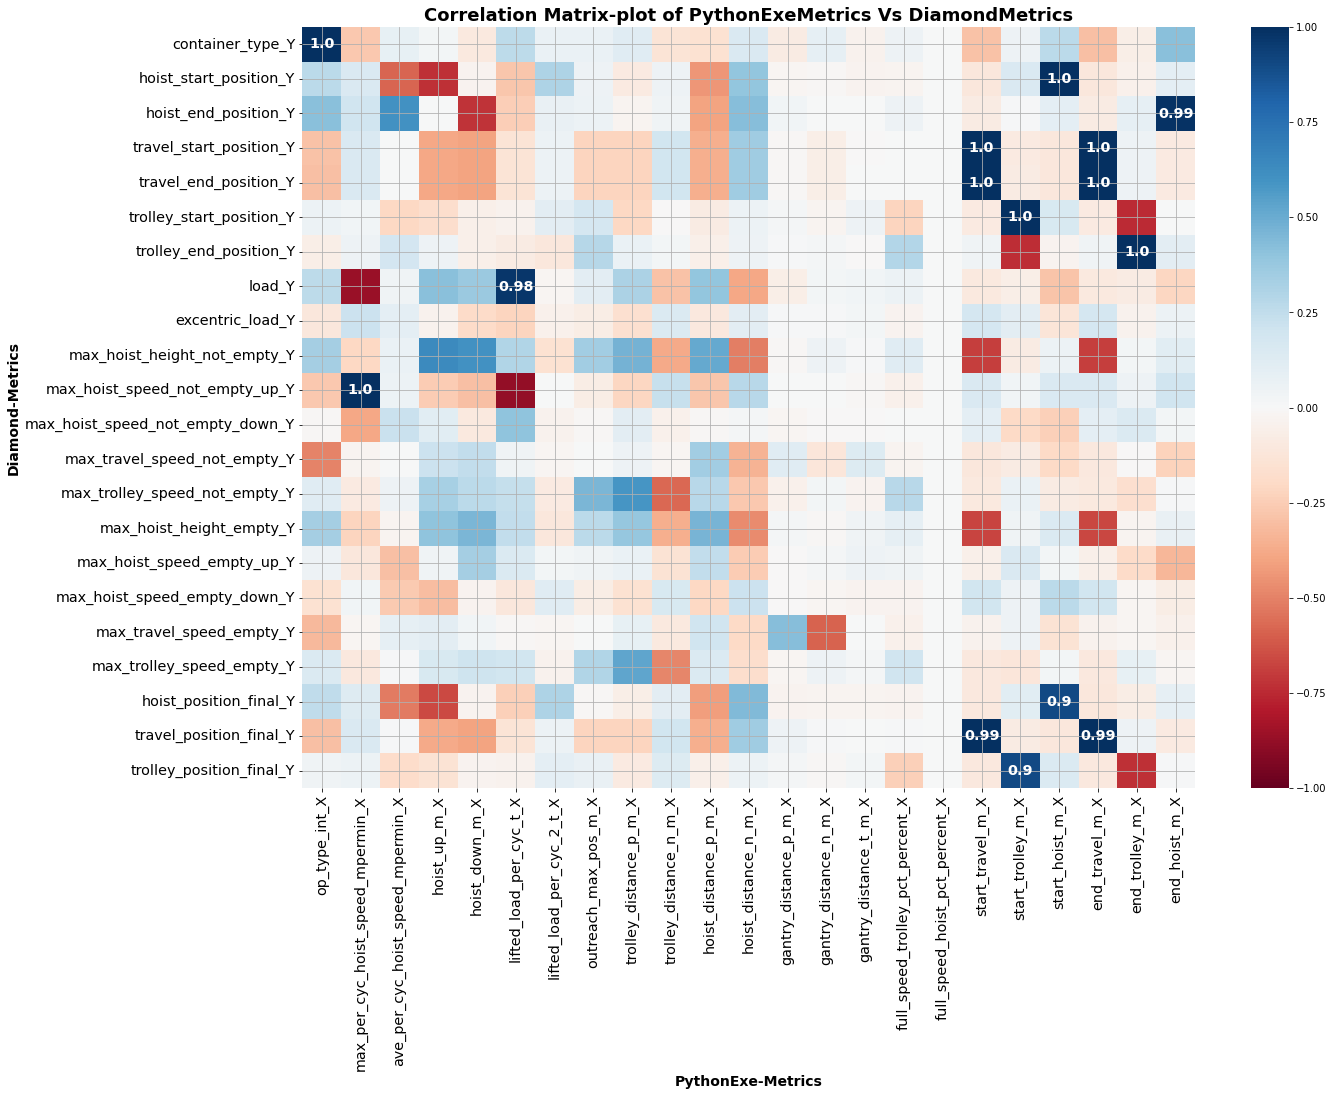

In [13]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(corr_matrix, 
                 vmin=-1, vmax=1, 
                 cbar=True,cmap='RdBu',
#                  mask=mask,
                 annot=True,
#                  square=True,
                )
ax.grid()
ax.set_title('Correlation Matrix-plot of PythonExeMetrics Vs DiamondMetrics', weight='bold', size=18)
ax.set_ylabel('Diamond-Metrics', weight='bold', size=14)
ax.set_xlabel('PythonExe-Metrics', weight='bold', size=14)
for text in ax.texts:
    t = float(text.get_text())
    if -0.9<t<0.9:
        text.set_text('')
    else:
        text.set_text(round(t,2))
    text.set_fontsize('x-large')
    text.set_fontweight('bold')
plt.xticks(rotation=90, size='x-large')
plt.yticks(rotation=0, size='x-large')
plt.show()

## Extracting the metrics with strong correlation
Now we need to extract the metric pairs which indicates strong correlation in the plot. Each pair will have a column from Exe-metrics and the correponding column from Diamond-metric which resulted in high correlation.
- There are 15 pair of metrics shows strong correlation among the data-sets.

In [14]:
high_corr_matrix = corr_matrix[~mask]
display(high_corr_matrix)
data = []
for idx, val in high_corr_matrix.iterrows():
    for col in high_corr_matrix.columns:
        if pd.isnull(val[col]):
            continue
        else:
            data.append((col,idx))
data

,op_type_int_X,max_per_cyc_hoist_speed_mpermin_X,ave_per_cyc_hoist_speed_mpermin_X,hoist_up_m_X,hoist_down_m_X,lifted_load_per_cyc_t_X,lifted_load_per_cyc_2_t_X,outreach_max_pos_m_X,trolley_distance_p_m_X,trolley_distance_n_m_X,hoist_distance_p_m_X,hoist_distance_n_m_X,gantry_distance_p_m_X,gantry_distance_n_m_X,gantry_distance_t_m_X,full_speed_trolley_pct_percent_X,full_speed_hoist_pct_percent_X,start_travel_m_X,start_trolley_m_X,start_hoist_m_X,end_travel_m_X,end_trolley_m_X,end_hoist_m_X
container_type_Y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hoist_start_position_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999944,NaN,NaN,NaN
hoist_end_position_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.988219
travel_start_position_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.999964,NaN,NaN
travel_end_position_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999964,NaN,NaN,1.000000,NaN,NaN
trolley_start_position_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999669,NaN,NaN,NaN,NaN
trolley_end_position_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999634,NaN
load_Y,NaN,NaN,NaN,NaN,NaN,0.975947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
excentric_load_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_hoist_height_not_empty_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[('op_type_int_X', 'container_type_Y'),
 ('start_hoist_m_X', 'hoist_start_position_Y'),
 ('end_hoist_m_X', 'hoist_end_position_Y'),
 ('start_travel_m_X', 'travel_start_position_Y'),
 ('end_travel_m_X', 'travel_start_position_Y'),
 ('start_travel_m_X', 'travel_end_position_Y'),
 ('end_travel_m_X', 'travel_end_position_Y'),
 ('start_trolley_m_X', 'trolley_start_position_Y'),
 ('end_trolley_m_X', 'trolley_end_position_Y'),
 ('lifted_load_per_cyc_t_X', 'load_Y'),
 ('max_per_cyc_hoist_speed_mpermin_X', 'max_hoist_speed_not_empty_up_Y'),
 ('start_hoist_m_X', 'hoist_position_final_Y'),
 ('start_travel_m_X', 'travel_position_final_Y'),
 ('end_travel_m_X', 'travel_position_final_Y'),
 ('start_trolley_m_X', 'trolley_position_final_Y')]

## Plotting the strongly correlated metrics 
Now that we have found the columns that are strongly related, we further investigate their relationship by plotting scatter plots for those 15 metric pairs. 

c:\users\sharsad\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


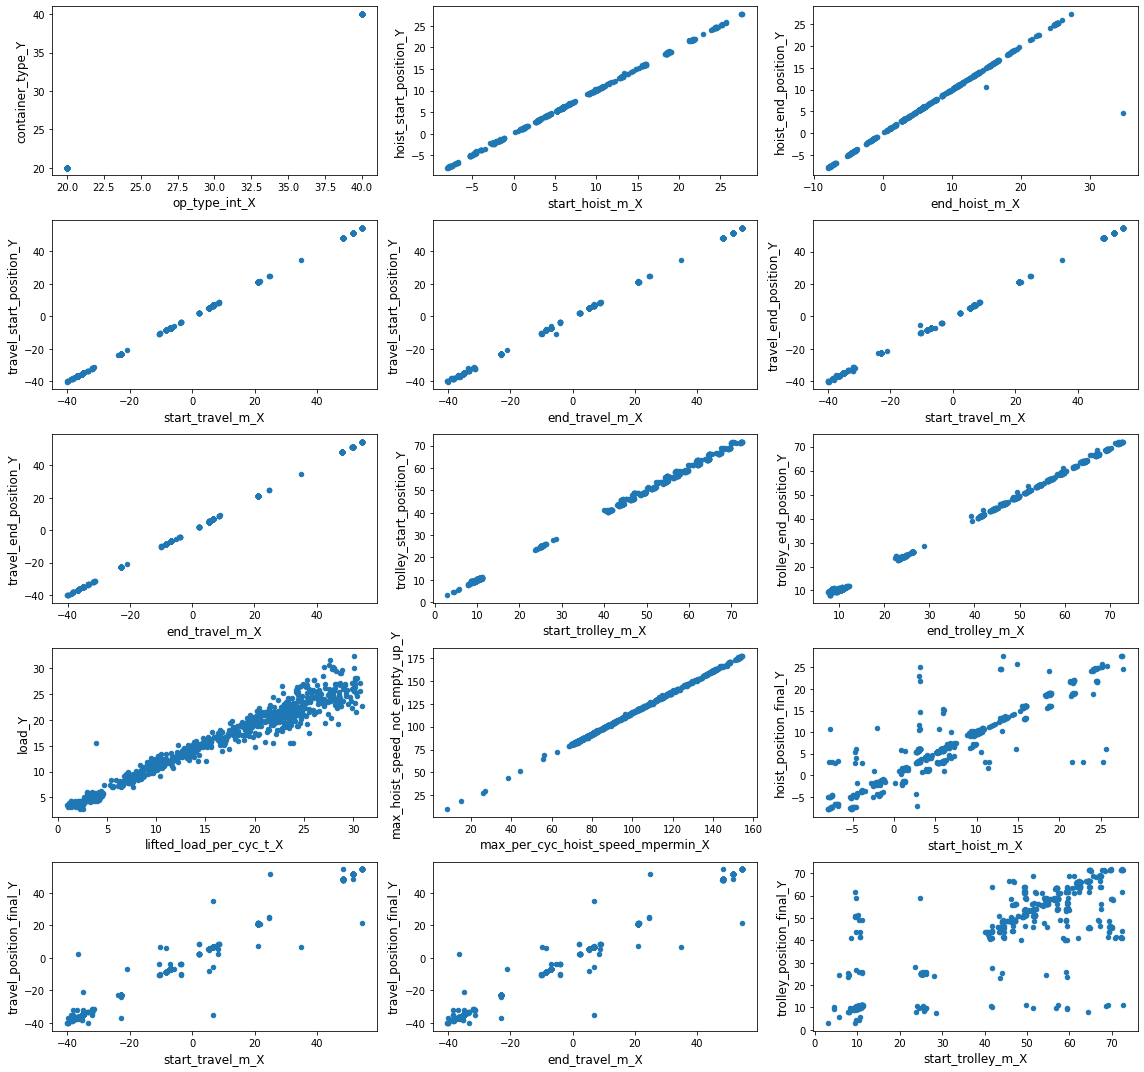

In [15]:
plt.figure(figsize=(16,15))
for i, ele in enumerate(data):
    x=ele[0]
    y=ele[1]
    plt.subplot(5,3,i+1)
    df_merge.plot.scatter(x, y, ax=plt.gca())
    plt.xlabel(x, size=12)
    plt.ylabel(y, size=12)
plt.tight_layout()
plt.show()

Interestingly, from scatter plots, we find that some of the strong correlation is coincidental. 
1. **Plot 5** : `end_travel_m_X` vs `travel_start_position_Y`- First one is the Gantry position at the end of the cycle and second metric reports the Gantry position at the start of the cycle. Strong correlation is only found because Gantry may not have moved much during the cycle resulting in same start and end position.
2. **Plot 6** : `start_travel_m_X` vs `travel_end_position_Y`- Same as above these columns are clearly reporting different metrics.
3. **Plot 12** : `start_hoist_m_X` vs `hoist_position_final_Y`- Former metric reports the hoist position at cycle start while the latter points to hoist at the end of the cycle.
4. **Plot 13** : `start_travel_m_X` vs `travel_position_final_Y`- Again clearly different metrics and the high correlation is by chance.
5. **Plot 14** : `end_travel_m_X` vs `travel_position_final_Y` - Regardless of the high correlation, scatter plot clearly shows these metrics are not the same. The first one from Executable data reports the Gantry position at the end of the lifting cycle while the second pair from Diamond data computes the Gantry position at the end of the complete cycle including the Travelling half cycle.
6. **Plot 15** : `start_trolley_m_X` vs `trolley_position_final_Y` - Metrics are clearly not the same as evident from the definintion and the scatter plot. 

**Based on the above points, we remove those 6 pairs from the highly correlated metric-pairs group.**

In [16]:
idx_req = set(range(15))-set([4,5,11,12,13,14])
data_req = [data[i] for i in idx_req]

In [17]:
data_req

[('op_type_int_X', 'container_type_Y'),
 ('start_hoist_m_X', 'hoist_start_position_Y'),
 ('end_hoist_m_X', 'hoist_end_position_Y'),
 ('start_travel_m_X', 'travel_start_position_Y'),
 ('end_travel_m_X', 'travel_end_position_Y'),
 ('start_trolley_m_X', 'trolley_start_position_Y'),
 ('end_trolley_m_X', 'trolley_end_position_Y'),
 ('lifted_load_per_cyc_t_X', 'load_Y'),
 ('max_per_cyc_hoist_speed_mpermin_X', 'max_hoist_speed_not_empty_up_Y')]

Finally, we rename the column headers back to its original names in the data set and display the metric-pairs which are found to be reporting same values in a tabular format. 

In [18]:
def split_exe(s):
    lst = s.split('_')[:-1]
    lst[0] = lst[0].title()
    result = '_'.join(lst[:-1])
    return f"{result} ({lst[-1]})"

def split_load(s):
    lst = s.split('_')[:-1]
    lst = [x.title() for x in lst]
    result = ''.join(lst)
    return result

summary = pd.DataFrame(data_req, 
                       columns = ['Python-Metrics', 'Diamond-Metrics'], 
                       index=pd.RangeIndex(1,len(data_req)+1))
summary['Python-Metrics'] = summary['Python-Metrics'].apply(split_exe)
summary['Diamond-Metrics'] = summary['Diamond-Metrics'].apply(split_load)
summary

,Python-Metrics,Diamond-Metrics
1,Op_type (int),ContainerType
2,Start_hoist (m),HoistStartPosition
3,End_hoist (m),HoistEndPosition
4,Start_travel (m),TravelStartPosition
5,End_travel (m),TravelEndPosition
6,Start_trolley (m),TrolleyStartPosition
7,End_trolley (m),TrolleyEndPosition
8,Lifted_load_per_cyc (t),Load
9,Max_per_cyc_hoist_speed (mpermin),MaxHoistSpeedNotEmptyUp


## Conclusion
- There are 9 metrics which are clearly shown to report same values in both data-set.
- Diamond-metrics has been found to register more cycles that are missing in Executable-metrics due to corrupted/missing signals. Hence, the redundant metrics can be removed from the Executable-metric data set. 
- There are many columns in Diamond data-set that are removed because of invalid or missing data. There might be correlated metrics among those which needs to be investigated with valid data. 